In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import mylibrary.nnlib as tnn
import mylibrary.dynamicnnlib as tdnn

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [47]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

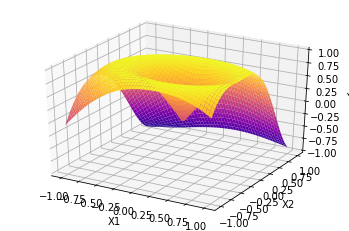

In [48]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [95]:
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(2, 4, optimizer=optim)
layer1 = tnn.NonLinearLayer(2, 5, tdnn.Relu_1Linear(), optimizer=optim)
# layer1 = tnn.NonLinearLayer(2, 5, tnn.Relu(), optimizer=optim)
layer2 = tnn.LinearLayer(5, 4, optimizer=optim)
layer3 = tnn.Relu()
layer4 = tnn.LinearLayer(4,1, optimizer=optim)

In [96]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

try:
    for epoch in range(100000):
        a2_ = linear.forward(xx)
        a1 = layer1.forward(xx)
        a2__ = layer2.forward(a1)
        a2a = a2_+a2__
        a2 = layer3.forward(a2a)
        yout = layer4.forward(a2)

        dy = yout - yy
        da2 = layer4.backward(dy)
        da2a = layer3.backward(da2)
        da2_, da2__ = da2a, da2a
        da1 = layer2.backward(da2__)
        dx__ = layer1.backward(da1)
        dx_ = linear.backward(da2_)
        dx = dx__ + dx_

        linear.update()
        layer1.update()
        layer2.update()
        layer4.update()

        if epoch%1000 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  3.901976272966626
1000 Error =  0.005175394825692414
2000 Error =  0.004325099101644989
3000 Error =  0.003987752019766747
4000 Error =  0.0039307391503856735
Closing Tk Plot 


0.003930686577977429


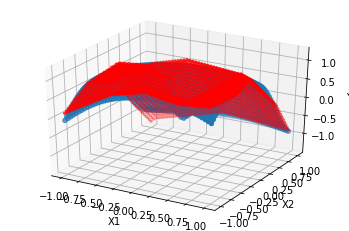

In [97]:
%matplotlib inline

a2_ = linear.forward(xx)
a1 = layer1.forward(xx)
a2__ = layer2.forward(a1)
a2a = a2_+a2__
a2 = layer3.forward(a2a)
yout = layer4.forward(a2)

error = ((yout - yy)**2).mean()/2
print(error)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

### plotting different sub_functions after shortcut

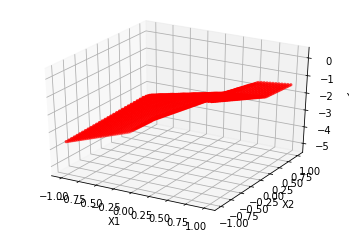

In [79]:
i=0
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, a2a[:,i].reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

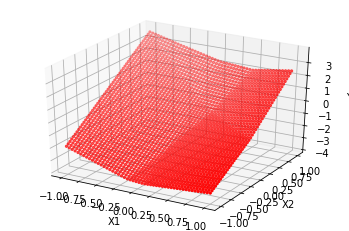

In [67]:
i=1
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, a2a[:,i].reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

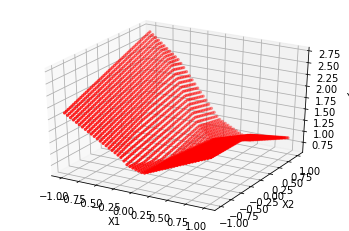

In [68]:
i=2
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, a2a[:,i].reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

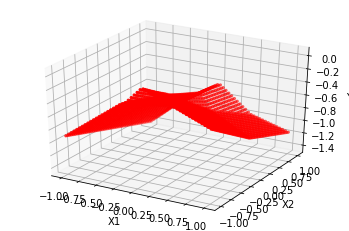

In [69]:
i=3
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, a2a[:,i].reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

In [57]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
for _ in range(100):
    for i in range(4):
        ax.clear()
        ax.scatter(X1, X2, a2__[:,i].reshape(-1), c=a2__[:,i].reshape(-1), marker='.')
        plt.pause(1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

TclError: can't invoke "update" command: application has been destroyed

### training layer1 and layer2 by removing shortcut(linear) layer

In [98]:
out = layer3.x
for epoch in range(5000):
    a1 = layer1.forward(xx)
    a2 = layer2.forward(a1)

    da2 = a2 - out
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)
    
#     layer1.weights[:,0] *= 0.

    layer2.update()
#     layer1.update()

    if epoch%1000 == 0:
        error = tnn.MseLoss().loss(a2, out)
        print(epoch, 'Error = ', error)
    

0 Error =  0.7598842106388314
1000 Error =  0.0031570213708727794
2000 Error =  0.002005695445044942
3000 Error =  0.001986620329314078
4000 Error =  0.001986599509582153


In [99]:
a2

array([[ 0.46355833, -4.42853474,  0.83576587, -0.99579117],
       [ 0.4364267 , -4.41803738,  0.81742705, -1.01773199],
       [ 0.40929507, -4.40754001,  0.79908823, -1.0396728 ],
       ...,
       [-2.35296488,  2.66955507,  1.82474802, -0.67661384],
       [-2.39893262,  2.66795252,  1.81672443, -0.70896007],
       [-2.44490035,  2.66634997,  1.80870084, -0.74130631]])

In [100]:
out

array([[ 0.55486528, -4.32692317,  0.82172897, -0.77980261],
       [ 0.52041836, -4.32456668,  0.80451476, -0.81904791],
       [ 0.48597144, -4.32221018,  0.78730054, -0.8582932 ],
       ...,
       [-2.33590319,  2.68854229,  1.82212507, -0.63625406],
       [-2.38096594,  2.68794686,  1.81396236, -0.66645952],
       [-2.42602868,  2.68735143,  1.80579964, -0.69666497]])

0.022551786087112592


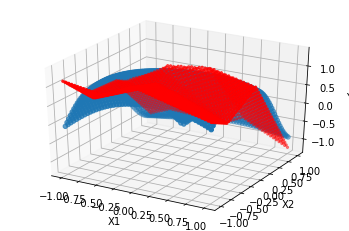

In [92]:
%matplotlib inline

a1 = layer1.forward(xx)
a2 = layer2.forward(a1)
a2 = layer3.forward(a2)
yout = layer4.forward(a2)

error = ((yout - yy)**2).mean()/2
print(error)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

In [94]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

try:
    for epoch in range(100000):
        a1 = layer1.forward(xx)
        a2 = layer2.forward(a1)
        a2 = layer3.forward(a2)
        yout = layer4.forward(a2)

        dy = yout - yy
        da2 = layer4.backward(dy)
        da2 = layer3.backward(da2)
        da1 = layer2.backward(da2)
        dx = layer1.backward(da1)

        layer1.update()
        layer2.update()
        layer4.update()

        if epoch%100 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  0.005603689172890723
100 Error =  0.005396262928447795
200 Error =  0.005258768289693745
300 Error =  0.005137686198975835
400 Error =  0.005111356980719603
500 Error =  0.005016698532055119
600 Error =  0.004987250846759796
700 Error =  0.004965375180295204
800 Error =  0.005142574165911285
Closing Tk Plot 
